# COURSE: Generate and visualize data in Python and MATLAB

## SECTION: Image noise

### https://www.udemy.com/course/suv-data-mxc/?couponCode=201910

### INSTRUCTOR: sincxpress.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy import stats
from scipy.signal import hilbert
from scipy import interpolate


---
# VIDEO: Normal and uniform
---


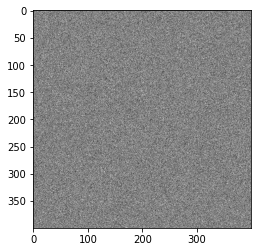

In [2]:
## Normally distributed noise

n = 400
img = np.random.randn(n,n)

plt.imshow(img,cmap='gray')
plt.show()

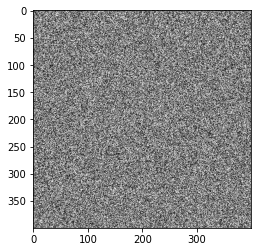

In [3]:
## Uniformly distributed noise

n = 400
img = np.random.rand(n,n)

plt.imshow(img,cmap='gray')
plt.show()

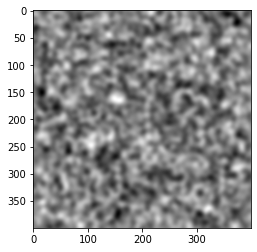

In [4]:
## Smoothed noise

n = 400

# create Gaussian
width = 5
[X,Y] = np.meshgrid(np.arange(0,int(n/4))-n/8,np.arange(0,round(n/4))-n/8)
gKern = np.exp(-(X**2 + Y**2) / (2*width**2))

# create image as convolution of noise and Gaussian
img = scipy.signal.convolve2d(np.random.randn(n,n),gKern,'same')

plt.imshow(img,cmap='gray')
plt.show()


---
# VIDEO: Checkerboard
---


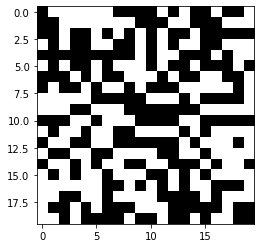

In [5]:
## random checkerboard noise

n = 20
img = np.random.randn(n,n) > 0 # set threshold for black/white balance

plt.imshow(img,cmap='gray')
plt.show()

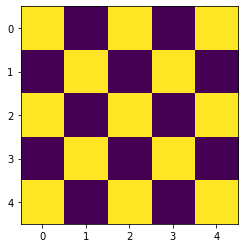

In [6]:
## regular checkerboard

n = 5  # must be odd
img = np.mod( np.reshape(np.arange(0,n*n),(n,n)) ,2) == 0
img = np.reshape(np.arange(0,n*n),(n,n)) % 2 == 0

plt.imshow(img)
plt.show()


---
# VIDEO: Perlin noise
---


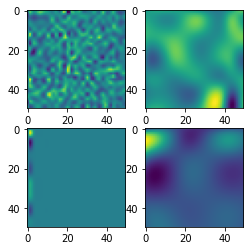

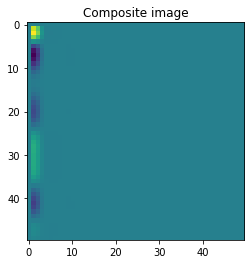

In [7]:
# Perlin-like noise

# image size (due to interpolation, best to leave <200)
n = 50

# initialize
m = 4; # number of frequencies (interpolation levels)
img = np.zeros((m,n,n))


# initialize for interp function
[oX,oY] = np.meshgrid(np.arange(0,n),np.arange(0,n))

# loop over frequencies (best to leave this <7)
for fi in range(m):
    
    # create random image and setup interpolation map
    z = np.random.randn(n,n)
    f = scipy.interpolate.interp2d(oX,oY,z,kind='cubic')
    
    # now interpolate
    k  = n*2**(fi+1)-1
    xx = np.linspace(0,n,k)
    [X,Y] = np.meshgrid(xx,xx)
    tmp = f(xx,xx)
    
    # take part of it (relatively smaller pieces of the map 
    # correspond to lower spatial frequencies)
    img[fi,:,:] = (fi+1)*tmp[0:n,0:n]


    # show each individual image
    loc = np.unravel_index(fi,[2,3],'F')
    plt.subplot2grid((2,3),(loc[0],loc[1]))
    plt.imshow(img[fi,:,:])


plt.show()

# show composite image
plt.imshow(sum(img))
plt.title('Composite image')
plt.show()



---
# VIDEO: Filtered 2D FFT noise
---


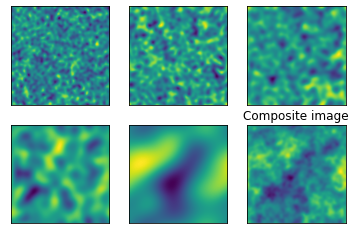

In [8]:
n = 400

# setup Gaussian
widths = np.linspace(.1,.01,5)
[x,y]  = np.meshgrid(stats.zscore(np.arange(0,n)),stats.zscore(np.arange(0,n)))
    
# initialize images
img = np.zeros((len(widths),n,n))

# loop over smoothness kernels
for fi in range(len(widths)):
    
    # 2D Gaussian
    gaus2d = np.exp(-(x**2 + y**2) / (2*widths[fi]**2))
    
    # random Fourier coefficients
    fc = np.multiply( np.random.rand(n,n) , np.exp(1j*2*np.pi* (2*np.pi*np.random.rand(n,n)) ) )
    
    # reconstruct and normalize image
    tmp = np.real(scipy.fftpack.ifft2( np.multiply(fc,scipy.fftpack.fftshift(gaus2d)) ))
    tmp = (tmp-np.mean(tmp)) / np.std(tmp)
    
    # image is inverse Fourier transform
    img[fi,:,:] = (1+fi)*tmp
    
    # show each individual image
    loc = np.unravel_index(fi,[3,2],'F')
    plt.subplot2grid((2,3),(loc[1],loc[0]))
    plt.imshow(img[fi,:,:])
    plt.xticks([])
    plt.yticks([])


# show composite image
plt.subplot2grid((2,3),(1,2))
plt.imshow(sum(img))
plt.title('Composite image')
plt.xticks([]), plt.yticks([])
plt.show()